# **Univariable Linear Regression Model**

#### **Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **Data Loading**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Datasets/weight_height_data.csv");

In [ ]:
df.head()

,weight,height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


#### **Exploratory Data Analysis (EDA)**

#### Scatter Plot: Height vs Weight

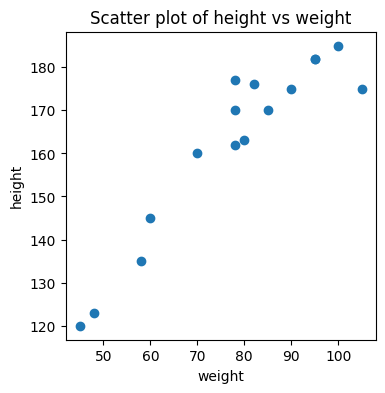

In [77]:
# Scatter Plot
plt.figure(figsize = (4,4));
plt.scatter(df["weight"], df["height"])
plt.xlabel("weight")
plt.ylabel("height")
plt.title("Scatter plot of height vs weight");
plt.show()

#### Pair Plot Visualization

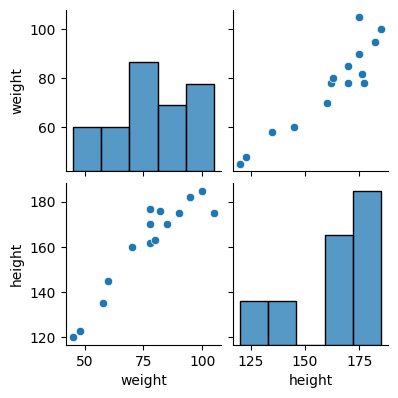

In [85]:
# plt.figure(figsize = (4,4))
sns.pairplot(df,height=2)
plt.show()

#### Correlation Analysis

In [ ]:
df.corr()

,weight,height
weight,1.000000,0.935939
height,0.935939,1.000000


#### **Feature Selection and Target Variable Definition**

In [ ]:
# Independent and Dependent features
X = df[["weight"]]
y = df["height"]

In [ ]:
print(f"Shape of X : {X.shape}")
print(f"Shape of y : {y.shape}")

Shape of X : (16, 1)
Shape of y : (16,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### **Train-Test Split**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

#### **Feature Scaling (Standardization)**

In [ ]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### **Linear Regression Model Training**

In [ ]:
# Linear Regression Model
regression = LinearRegression()

In [ ]:
regression.fit(X_train,y_train)

LinearRegression()

#### **Model Prediction**

In [ ]:
y_pred = regression.predict(X_test)
print(f"Actual y values : \n",y_test)
print(f"Predicted y values : \n",y_pred)

Actual y values : 
 0     120
1     135
5     162
14    170
Name: height, dtype: int64
Predicted y values : 
 [132.07587216 144.69529153 164.10978287 170.90485484]


#### **Model Parameters Interpretation**

In [ ]:
coefficient = regression.coef_
intercept = regression.intercept_

print(f"coefficient = {coefficient}")
print(f"intercept = {intercept}")

coefficient = [15.53727987]
intercept = 167.75


#### **Model Visualization**

#### Best-Fit Line on Training Data



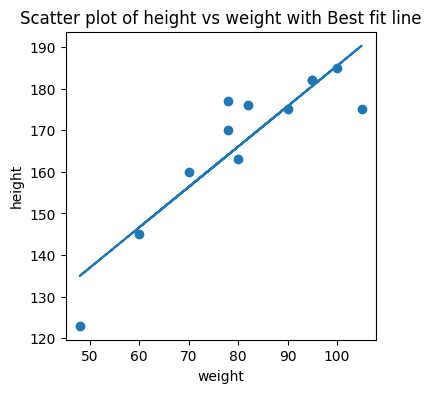

In [ ]:
# Regression Prediction
X_train_original = scaler.inverse_transform(X_train)

plt.figure(figsize = (4,4))
plt.scatter(X_train_original,y_train)
plt.plot(X_train_original,regression.predict(X_train))
plt.xlabel("weight")
plt.ylabel("height")
plt.title("Scatter plot of height vs weight with Best fit line");
plt.show()

#### Best-Fit Line on Test Data

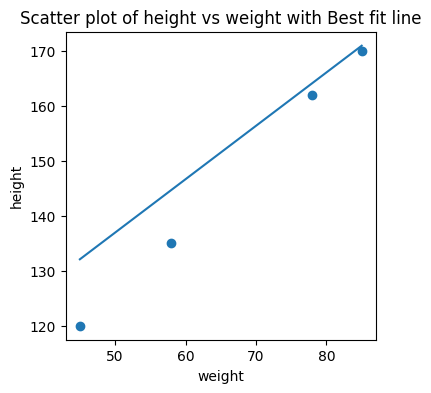

In [ ]:
X_test_original = scaler.inverse_transform(X_test)

plt.figure(figsize = (4,4))
plt.scatter(X_test_original,y_test)
plt.plot(X_test_original,regression.predict(X_test))
plt.xlabel("weight")
plt.ylabel("height")
plt.title("Scatter plot of height vs weight with Best fit line");
plt.show()

#### **Prediction Results DataFrames**

#### Training Data Predictions

In [ ]:
X_train_original_reshaped = X_train_original.flatten()

y_predictions_train = regression.predict(X_train)
train_prediction_df = pd.DataFrame({
    "weight" : X_train_original_reshaped,
    "height" : y_train,
    "predicted_height" : y_predictions_train
})

In [ ]:
train_prediction_df

,weight,height,predicted_height
13,100.0,185,185.465723
11,95.0,182,180.612101
8,95.0,182,180.612101
9,78.0,170,164.109783
2,48.0,123,134.988046
15,78.0,177,164.109783
4,70.0,160,156.343986
7,90.0,175,175.758478
10,82.0,176,167.992681
12,105.0,175,190.319346


#### Test Data Predictions

In [ ]:
X_test_original_reshaped = X_test_original.flatten()

y_predictions_test = regression.predict(X_test)
test_prediction_df = pd.DataFrame({
    "weight" : X_test_original_reshaped,
    "height" : y_test,
    "predicted_height" : y_predictions_test
})

In [ ]:
test_prediction_df

,weight,height,predicted_height
0,45.0,120,132.075872
1,58.0,135,144.695292
5,78.0,162,164.109783
14,85.0,170,170.904855


#### **Model Evaluation Metrics**

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(f"mean squared error = {mse}")
print(f"mean absolute error = {mae}")
print(f"root mean squared error = {rmse}")

mean squared error = 61.27382813009146
mean absolute error = 6.196450353744808
root mean squared error = 7.827760096610745


#### **Model Serialization**

In [ ]:
import pickle

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Models/weight_height_linear_model.pkl'

# Open the file in write binary mode ('wb') and dump the model
with open(filename, 'wb') as file:
    pickle.dump(regression, file)


#### **Model Loading and Validation**

In [78]:
model_filename = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Models/weight_height_linear_model.pkl'

# Open the file in read binary mode ('rb') and load the model
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

In [79]:
loaded_model_predictions = loaded_model.predict(X_test)

In [80]:
loaded_model_predictions

array([132.07587216, 144.69529153, 164.10978287, 170.90485484])